In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
data = pd.read_csv('./lending-club-data.csv', low_memory=False)

In [3]:
print(data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [4]:
col_subset = ['annual_inc','loan_amnt']
data_clean  = data[col_subset].dropna()
data_clean = data_clean.sample(n=1000)

In [5]:
X1 = data_clean['annual_inc'].tolist()
X2 = data_clean['loan_amnt'].tolist()

X = np.column_stack((X1, X2))
X_scaled = preprocessing.scale(X)


In [7]:
# fit the model
clf = LocalOutlierFactor(n_neighbors=200)
y_pred = clf.fit_predict(X_scaled)
# y_pred_outliers = y_pred[200:]

maxgrille = np.amax(X_scaled)
mingrille = np.amin(X_scaled)
diffgrille = maxgrille - mingrille
maxgrille += 0.05 * diffgrille
mingrille -= 0.05 * diffgrille

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(mingrille, maxgrille, 50), np.linspace(mingrille, maxgrille, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

X_pos = []
X_neg = []
for i in range(len(X_scaled)):
    if y_pred[i] == 1:
        X_pos.append(X_scaled[i])
    else:
        X_neg.append(X_scaled[i])


neg =  100
pos =  900


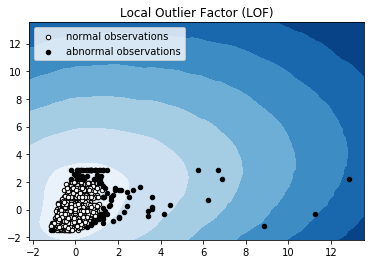

In [8]:
taillepos = len(X_pos)
tailleneg = len(X_neg)
print("neg = ", tailleneg)
print("pos = ", taillepos)
X_pos = np.array(X_pos)
X_neg = np.array(X_neg)

a = plt.scatter(X_pos[:, 0], X_pos[:, 1], c='white', edgecolor='k', s=20)
b = plt.scatter(X_neg[:, 0], X_neg[:, 1], c='black', edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((mingrille, maxgrille))
plt.ylim((mingrille, maxgrille))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()